# **Data Analysis**

In [10]:
# Imports
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import fftconvolve

import matplotlib.pyplot as plt
from matplotlib import ticker

import librosa.display
import numpy as np
import os

## **1. Loading MEL Scales**

1.1. 10_experiment8_5tesMic_Schaufel_rumlaufen

In [9]:
# Paths to your audio files in the aligned folder
audio_exp8_path = "../Data/raw/11_A_09_experiment7/A_09_experiment7.wav"

# Load aligned audio files
audio_knock, sr1 = librosa.load(audio_exp8_path, sr=None)
print("audio_exp8 loaded.")

/var/folders/rh/swfvk_zs36s3zmd3j2nmq0kw0000gn/T/ipykernel_12555/588013395.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_knock, sr1 = librosa.load(audio_exp8_path, sr=None)
/opt/miniconda3/envs/pt1/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '../Data/raw/11_A_09_experiment7/A_09_experiment7.wav'

In [ ]:
# Apply STFT (Short-term Fourier Transform) for all files
print("Applying Short-term Fourier Transform (STFT)...")
stft_knock = librosa.stft(audio_knock, n_fft=1024, hop_length=512)

Applying Short-term Fourier Transform (STFT)...


In [ ]:
# Convert to Mel-spectrogram
print("Converting to Mel-spectrogram...")
mel_knock = librosa.feature.melspectrogram(S=np.abs(stft_knock), sr=sr1, n_mels=128)

# Convert Mel-spectrogram to dB scale
print("Converting Mel-spectrogram to dB scale...")
mel_db_knock = librosa.power_to_db(mel_knock, ref=np.max)

# Normalize the mel-spectrograms (optional)
print("Normalizing Mel-spectrograms...")
mel_db_knock = (mel_db_knock - np.mean(mel_db_knock)) / np.std(mel_db_knock)

# Save Mel-spectrograms as numpy arrays for future use
print("Saving Mel-spectrograms...")
np.save("../Data/mel/mel_db_exp8.npy", mel_db_knock)

Converting to Mel-spectrogram...
Converting Mel-spectrogram to dB scale...
Normalizing Mel-spectrograms...
Saving Mel-spectrograms...


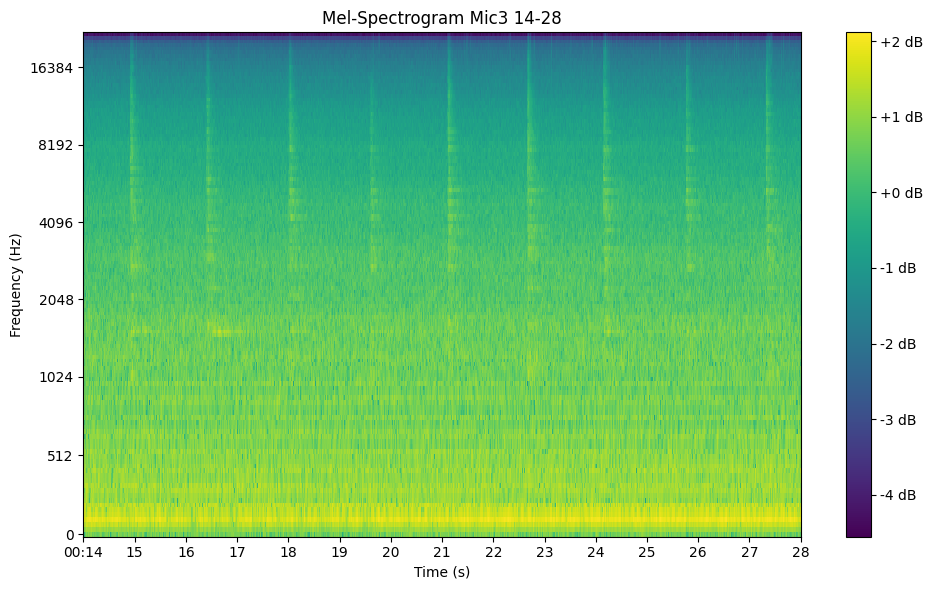

In [ ]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Mic3 14-28', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_A_09_experiment7.png')
plt.show()

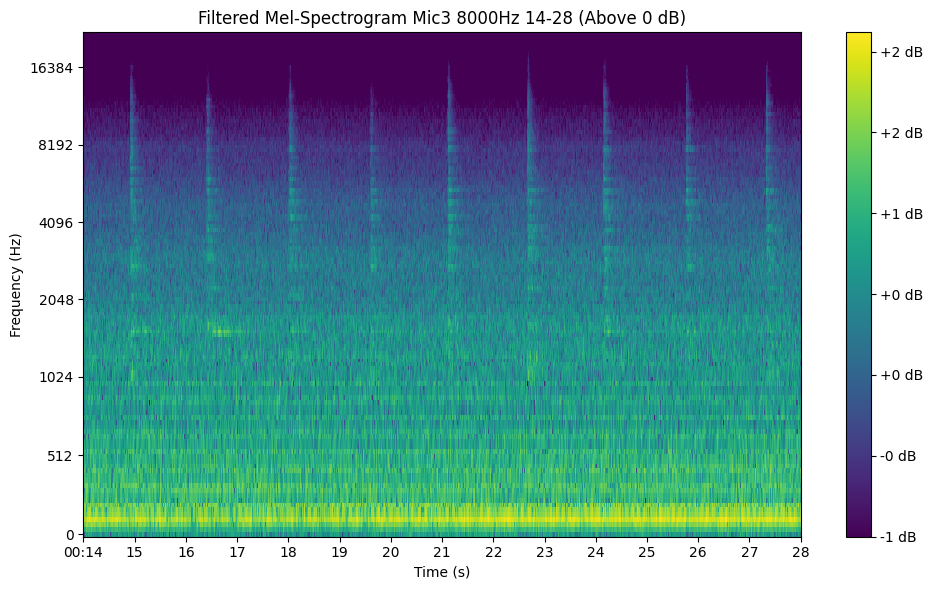

In [ ]:
# Filter to display only sounds above +0 dB
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the minimum dB level displayed by the color map
img2 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax, vmin=-1)

# Set title, labels, and x-axis limits
ax.set(title='Filtered Mel-Spectrogram Mic3 8000Hz 14-28 (Above 0 dB)', xlabel='Time (s)', ylabel='Frequency (Hz)')
ax.set_xlim([14, 28])

# Apply the custom x-axis formatter
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img2, ax=ax, format='%+2.0f dB')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_A_09_experiment7_8000_filtered.png')
plt.show()

1.2. 08_livetest_knackgeräusch_output_MIC3

In [14]:
# Paths to your audio files in the aligned folder
audio_knock_path = "../Data/raw/08_livetest_knackgeräusch/output_MIC3_2024-11-07_13-55-04_968247.wav"

# Load aligned audio files
audio_knock, sr1 = librosa.load(audio_knock_path, sr=None)
print("audio_knock loaded.")

audio_knock loaded.


In [15]:
# Apply STFT (Short-term Fourier Transform) for all files
print("Applying Short-term Fourier Transform (STFT)...")
stft_knock = librosa.stft(audio_knock, n_fft=1024, hop_length=512)

Applying Short-term Fourier Transform (STFT)...


In [16]:
# Convert to Mel-spectrogram
print("Converting to Mel-spectrogram...")
mel_knock = librosa.feature.melspectrogram(S=np.abs(stft_knock), sr=sr1, n_mels=128)

# Convert Mel-spectrogram to dB scale
print("Converting Mel-spectrogram to dB scale...")
mel_db_knock = librosa.power_to_db(mel_knock, ref=np.max)

# Normalize the mel-spectrograms (optional)
print("Normalizing Mel-spectrograms...")
mel_db_knock = (mel_db_knock - np.mean(mel_db_knock)) / np.std(mel_db_knock)

# Save Mel-spectrograms as numpy arrays for future use
print("Saving Mel-spectrograms...")
np.save("../Data/mel/mel_db_knock.npy", mel_db_knock)

Converting to Mel-spectrogram...
Converting Mel-spectrogram to dB scale...
Normalizing Mel-spectrograms...
Saving Mel-spectrograms...


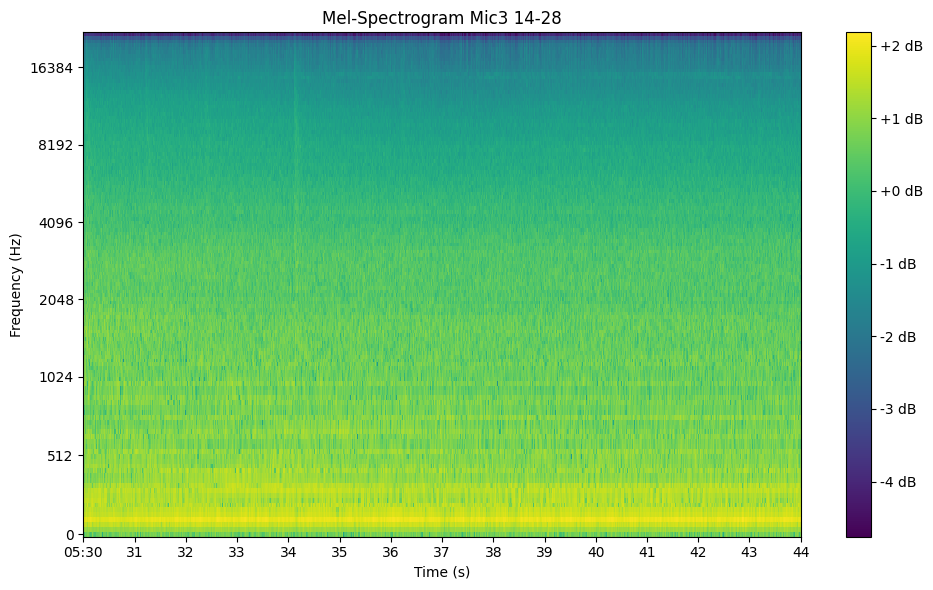

In [ ]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Mic3 14-28', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([330, 344])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_8.png')
plt.show()

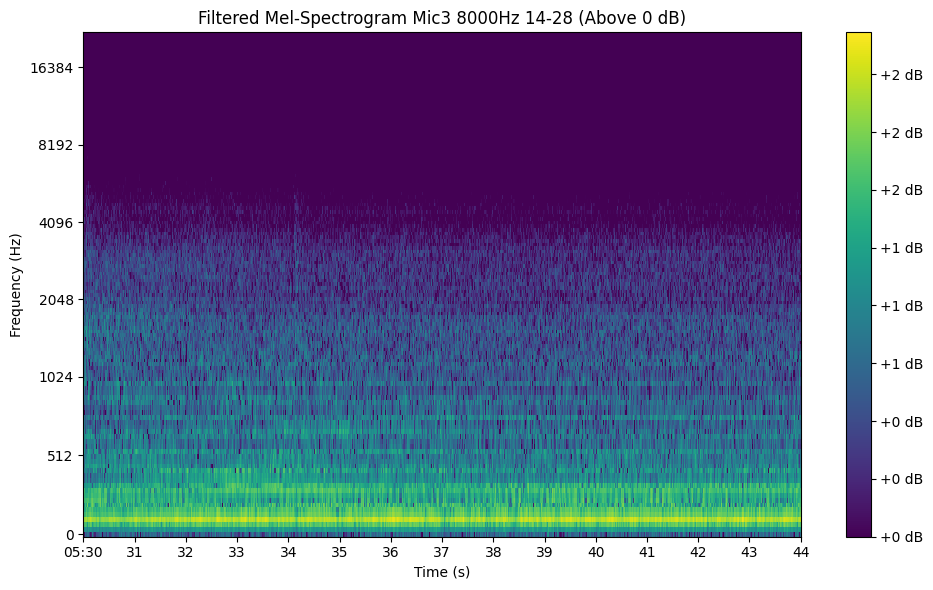

In [24]:
# Filter to display only sounds above +0 dB
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the minimum dB level displayed by the color map
img2 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax, vmin=0)

# Set title, labels, and x-axis limits
ax.set(title='Filtered Mel-Spectrogram Mic3 8000Hz 14-28 (Above 0 dB)', xlabel='Time (s)', ylabel='Frequency (Hz)')
ax.set_xlim([330, 344])

# Apply the custom x-axis formatter
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img2, ax=ax, format='%+2.0f dB')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_4_8000_filtered.png')
plt.show()

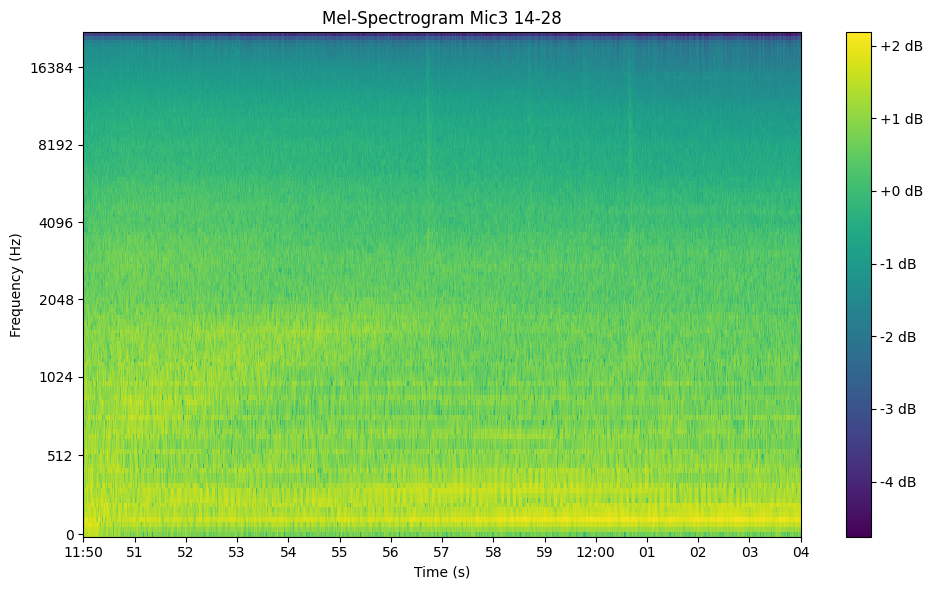

In [54]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Mic3 14-28', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([710, 724])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_8.png')
plt.show()

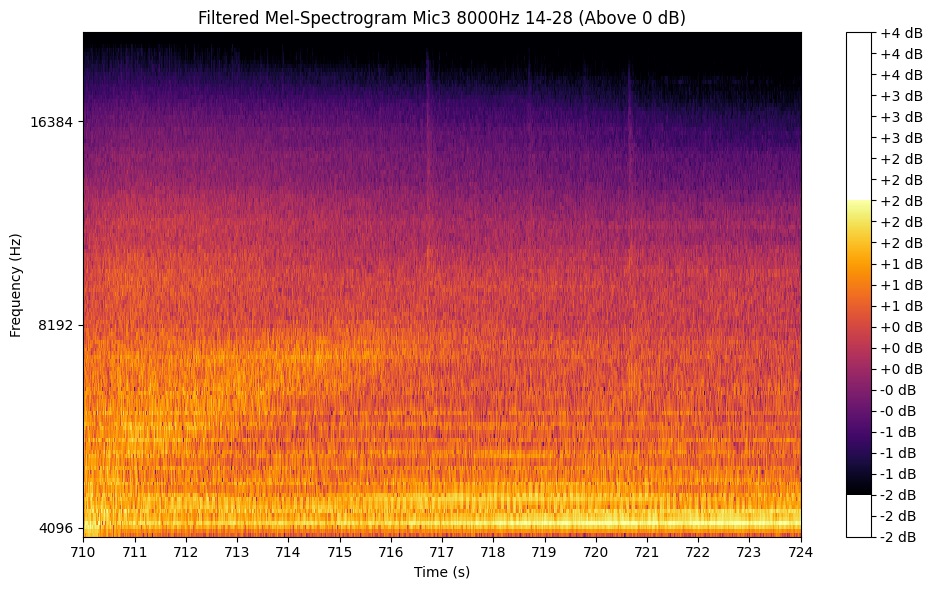

In [ ]:
# Filter to display only sounds above +0 dB
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the minimum dB level displayed by the color map
img2 = librosa.display.specshow(mel_db_knock, sr=sr1, x_axis='time', y_axis='mel', cmap='inferno', ax=ax, vmin=-1.5, vmax=2)

# Set title, labels, and x-axis limits
ax.set(title='Filtered Mel-Spectrogram Mic3 8000Hz 14-28 (Above 0 dB)', xlabel='Time (s)', ylabel='Frequency (Hz)')
ax.set_xlim([710, 724])

# Apply the custom x-axis formatter
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x)}"))

# Set color bar for dB scale
cbar = fig.colorbar(img2, ax=ax, format='%+2.0f dB')
cbar.set_ticks([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4])  # Add more tick marks for finer color gradation


# Adjust layout and show the plot
plt.tight_layout()
#plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_4_8000_filtered.png')
plt.show()

In [55]:
# Convert to Mel-spectrogram
print("Converting to Mel-spectrogram...")
mel_knock_highHZ = librosa.feature.melspectrogram(S=np.abs(stft_knock), sr=sr1,fmin=2500 , n_mels=128)

# Convert Mel-spectrogram to dB scale
print("Converting Mel-spectrogram to dB scale...")
mel_db_knock_highHZ = librosa.power_to_db(mel_knock_highHZ, ref=np.max)

# Normalize the mel-spectrograms (optional)
print("Normalizing Mel-spectrograms...")
mel_db_knock_highHZ = (mel_db_knock_highHZ - np.mean(mel_db_knock_highHZ)) / np.std(mel_db_knock_highHZ)

# Save Mel-spectrograms as numpy arrays for future use
print("Saving Mel-spectrograms...")
np.save("../Data/mel/mel_db_knock.npy", mel_db_knock_highHZ)

Converting to Mel-spectrogram...
Converting Mel-spectrogram to dB scale...
Normalizing Mel-spectrograms...
Saving Mel-spectrograms...


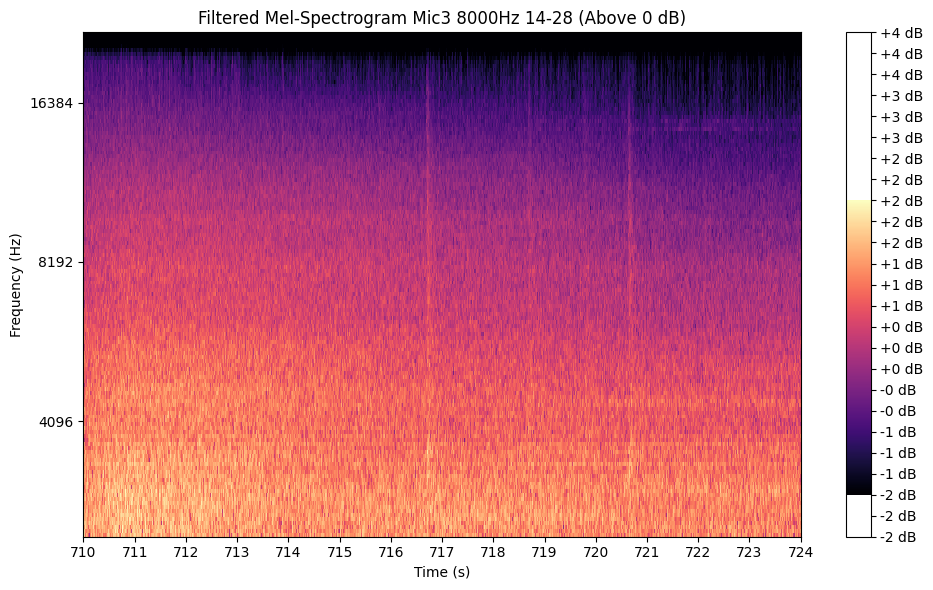

In [58]:
# Filter to display only sounds above +0 dB
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the minimum dB level displayed by the color map
img2 = librosa.display.specshow(mel_db_knock_highHZ, sr=sr1, x_axis='time', y_axis='mel', cmap='magma', ax=ax, fmin=2500, vmin=-1.5, vmax=2)

# Set title, labels, and x-axis limits
ax.set(title='Filtered Mel-Spectrogram Mic3 8000Hz 14-28 (Above 0 dB)', xlabel='Time (s)', ylabel='Frequency (Hz)')
ax.set_xlim([710, 724])

# Apply the custom x-axis formatter
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x)}"))

# Set color bar for dB scale
cbar = fig.colorbar(img2, ax=ax, format='%+2.0f dB')
cbar.set_ticks([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4])  # Add more tick marks for finer color gradation


# Adjust layout and show the plot
plt.tight_layout()
#plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_4_8000_filtered.png')
plt.show()